In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from itertools import product
import matplotlib.pyplot as plt

# load dataset 10

In [2]:
df = pd.read_csv('10_all_numerical.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137386 entries, 0 to 137385
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              137381 non-null  float64
 1   action_taken                              137386 non-null  int64  
 2   loan_type                                 137386 non-null  int64  
 3   lien_status                               137386 non-null  int64  
 4   reverse_mortgage                          137386 non-null  int64  
 5   open_end_line_of_credit                   137386 non-null  int64  
 6   loan_amount                               137386 non-null  int64  
 7   combined_loan_to_value_ratio              137091 non-null  float64
 8   interest_rate                             110401 non-null  float64
 9   total_loan_costs                          110401 non-null  float64
 10  origination_charges 

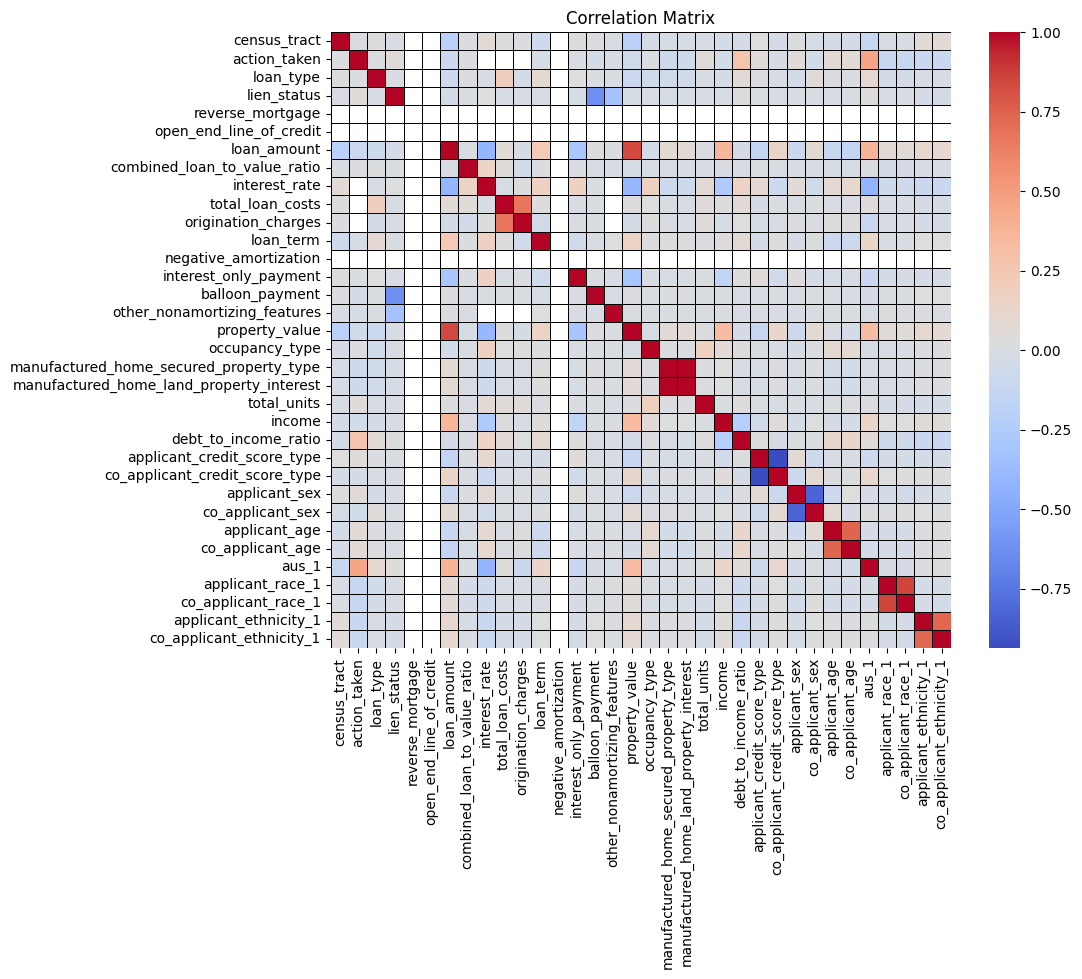

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with Seaborn and add grid lines
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True, linecolor='black')

# Set plot labels
plt.title("Correlation Matrix")
plt.show()

In [5]:
print(df['action_taken'].value_counts())

action_taken
1    110401
3     26985
Name: count, dtype: int64


#  chi-squared test for independence: For Categorical Columns

This test measures the association between two categorical variables. In your case, you can apply the chi-squared test to check the association between 'action_taken' equal to 1 or 3 and each of the other categorical columns in your dataset.

Chi-squared statistic: 
The value is a measure of the difference between the observed and expected frequencies of the categories in the contingency table. 
A larger Chi-squared statistic indicates a stronger association between the two variables. 

P-value: 
The p-value is a measure of the probability of observing a Chi-squared statistic as extreme as the one calculated, assuming that there is no association between the variables. 

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_columns = [
    'combined_loan_to_value_ratio',
    'interest_rate',
    'total_loan_costs',
    'origination_charges',
    'loan_term',
    'property_value',
    'total_units',
    'debt_to_income_ratio',
    'applicant_age',
    'co_applicant_age',
    'applicant_ethnicity_1',
    'co_applicant_ethnicity_1',
    'applicant_race_1',
    'co_applicant_race_1',
    'applicant_sex',
    'co_applicant_sex'
]

target_column = df['action_taken']
values = [1, 3]  # Values for 'action_taken'

results = []  # To store results

for value in values:
    for column in categorical_columns:
        # Create a cross-tabulation table
        table = pd.crosstab(target_column == value, df[column])
        
        # Perform the chi-squared test
        chi2, p, _, _ = chi2_contingency(table)
        
        # Append the results to the list
        results.append([column, value, chi2, p])

# Create a dataframe from the results
results_df1 = pd.DataFrame(results, columns=['Categorical_Column', 'Action_Taken', 'Chi-Squared', 'P-Value'])

# Print the dataframe
print(results_df1)

              Categorical_Column  Action_Taken   Chi-Squared        P-Value
0   combined_loan_to_value_ratio             1  43234.055734  1.729232e-203
1                  interest_rate             1      0.000000   1.000000e+00
2               total_loan_costs             1      0.000000   1.000000e+00
3            origination_charges             1      0.000000   1.000000e+00
4                      loan_term             1    329.749021   3.423379e-68
5                 property_value             1   6453.269960   0.000000e+00
6                    total_units             1    421.459554   4.972393e-91
7           debt_to_income_ratio             1  35555.384021   0.000000e+00
8                  applicant_age             1   1183.222248  2.998499e-251
9               co_applicant_age             1   1097.338395  7.855420e-234
10         applicant_ethnicity_1             1   1473.508614   0.000000e+00
11      co_applicant_ethnicity_1             1   1427.859554   0.000000e+00
12          

# t-test or ANOVA: For Numerical Columns 

T-statistic: 
The t-statistic measures the difference between the means of the two groups you are comparing.
A larger absolute t-statistic value suggests a more significant difference between the groups. 

P-value: 
The p-value is a measure of the evidence against a null hypothesis. 
In this context, a small p-value suggests that there is strong evidence to reject the null hypothesis, 
which typically states that there is no difference between the groups. 

In [7]:
from scipy.stats import ttest_ind
import pandas as pd

numerical_columns = [
    'census_tract',
    'loan_type',
    'lien_status',
    'reverse_mortgage',
    'open_end_line_of_credit',
    'loan_amount',
    'negative_amortization',
    'interest_only_payment',
    'balloon_payment',
    'other_nonamortizing_features',
    'occupancy_type',
    'manufactured_home_secured_property_type',
    'manufactured_home_land_property_interest',
    'income',
    'applicant_credit_score_type',
    'co_applicant_credit_score_type',
    'aus_1'
]

target_column = df['action_taken']
values = [1, 3]  # Values for 'action_taken'

results = []  # To store results

for value in values:
    for column in numerical_columns:
        # Select data for 'action_taken' equal to the current value
        action_taken = df[df['action_taken'] == value][column]

        # Select data for the other 'action_taken' value
        other_action_taken = df[df['action_taken'] != value][column]

        # Perform a t-test
        t_statistic, p_value = ttest_ind(action_taken, other_action_taken, equal_var=False)
        
        # Append the results to the list
        results.append([column, value, t_statistic, p_value])

# Create a dataframe from the results
results_df2 = pd.DataFrame(results, columns=['Numerical_Column', 'Action_Taken', 'T-Statistic', 'P-Value'])

# Print the dataframe
print(results_df2)

C:\Users\asche\AppData\Local\Temp\ipykernel_23800\356165315.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(action_taken, other_action_taken, equal_var=False)


                            Numerical_Column  Action_Taken  T-Statistic  \
0                               census_tract             1          NaN   
1                                  loan_type             1    -5.438556   
2                                lien_status             1   -10.789662   
3                           reverse_mortgage             1          NaN   
4                    open_end_line_of_credit             1          NaN   
5                                loan_amount             1    36.676718   
6                      negative_amortization             1          NaN   
7                      interest_only_payment             1    -3.272166   
8                            balloon_payment             1     7.174170   
9               other_nonamortizing_features             1     3.873988   
10                            occupancy_type             1    -4.624022   
11   manufactured_home_secured_property_type             1    18.541048   
12  manufactured_home_lan

In [8]:
# Save the chi-squared results as CSV
results_df1.to_csv('chi_squared_results.csv', index=False)

# Save the t-test results as CSV
results_df2.to_csv('t_test_results.csv', index=False)

# Conclusion.

## Categorical.

### applicant_ethnicity_1, co_applicant_ethnicity_1, applicant_race_1, and co_applicant_race_1: 
The chi-squared statistics for these variables are significant, with p-values close to zero. These categorical variables have a highly significant impact on the outcomes.

### combined_loan_to_value_ratio: 
The chi-squared statistic is 43234.06, and the p-value is approximately 1.73e-203. This suggests that the "combined_loan_to_value_ratio" has a highly significant impact on the outcomes associated with "action_taken."

### property_value: 
The chi-squared statistic is 6453.27, and the p-value is 0.0. This indicates that "property_value" has a __highly significant__ impact on the outcomes.

### debt_to_income_ratio: 
The chi-squared statistic is 35555.38, and the p-value is 0.0. This indicates that "debt_to_income_ratio" has a __highly significant__ impact on the outcomes.

### total_units: 
The chi-squared statistic is 421.46, and the p-value is approximately 4.97e-91. This suggests that "total_units" __significantly__ affects the outcomes.

### loan_term: 
The chi-squared statistic is 329.75, and the p-value is approximately 3.42e-68. This suggests that "loan_term" __significantly__ affects the outcomes associated with "action_taken."

### applicant_age and co_applicant_age: 
The chi-squared statistics for these variables are significant with very low p-values, suggesting that the ages of the applicants and co-applicants __significantly__ affect the outcomes.

### applicant_sex and co_applicant_sex: 
The chi-squared statistics for these variables are also significant, indicating that the gender of the applicants and co-applicants __significantly__ affects the outcomes.


### interest_rate, total_loan_costs, and origination_charges: 
The chi-squared statistics for these variables are 0.0, and the p-values are 1.0. This indicates that these variables __do not__ have a significant impact on the outcomes. In other words, there is no evidence of a relationship between these variables and "action_taken."

------------------------------------------------------------------------------


## Numerical.

### loan_amount: 
The t-statistic is 36.68, and the p-value is almost zero (4.28e-290). This suggests that "loan_amount" has a __highly significant__ impact on the outcomes associated with "action_taken." The size of the loan significantly affects the results.

### loan_type: 
The t-statistic is -5.44, and the p-value is approximately 5.40e-08. This suggests that "loan_type" has a statistically __significant__ effect on the outcomes associated with "action_taken." In other words, the type of loan significantly influences the results.

### lien_status: 
The t-statistic is -10.79, and the p-value is approximately 4.37e-27. This indicates that "lien_status" also has a __highly significant__ impact on the outcomes. Different lien statuses significantly affect the results.

------------------------------------------------------------------------------

### interest_only_payment, balloon_payment, other_nonamortizing_features, occupancy_type, manufactured_home_secured_property_type, manufactured_home_land_property_interest, applicant_credit_score_type, and co_applicant_credit_score_type: 
These columns have t-statistics and p-values that indicate a statistically significant influence on the outcomes. In each case, the variable __significantly__ affects the results.

### aus_1: 
The t-statistic is -293.30, and the p-value is 0.0. This suggests that "aus_1" has a highly significant impact on the outcomes. The specific "aus_1" type __significantly__ affects the results.

### reverse_mortgage, open_end_line_of_credit, negative_amortization, and income: 
The t-statistics and p-values are NaN, indicating potential issues with these columns or the data. Investigate and clean the data if necessary.

### census_tract: 
The t-statistic and p-value are both NaN, which suggests that there might be issues with the data in this column or the way the t-test was applied. You should investigate this further.

